# Analysis on Netflix Movies &Tv shows
Netflix is a popular service that people across the world ue for entertainment. In this Exploratory Data analysis i will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn!
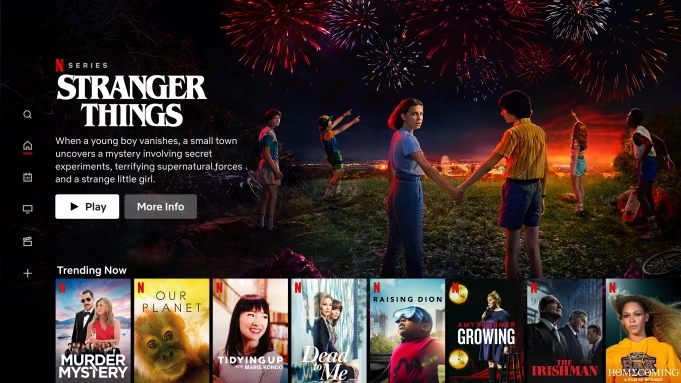

 

## About the data

In this exploratory data analysis the dataset consists of the following columns:

## FEATURES:

SHOW-ID - Unique id of each show (not much of a use for us in this notebook)

TYPE - The category of a show, can be either a Movie or a TV Show

TITLE - Name of the show

DIRECTOR - Name of the director(s) of the show

CAST - Name of the show

COUNTRY - Name of countries the show is available to watch on Netflix

DATE ADDED - Date when the show was added on Netflix

RATING - Show rating on netflix

RELEASE YEAR - Release year of the show

DURATION - Time duration of the show

LISTED IN - Genre of the show


### Importing necessary libraries

### LIBRARIES:

Library **pandas** will be required to work with data in tabular representation.

Library **numpy** will be required to round the data in the correlation matrix.

Library **missingno** will be required to visualize missing values in the data.

Library **matplotlib, seaborn, plotly** required for data visualization.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno
%matplotlib inline

### Loading the dataset
Now we are ready to load the dataset.We will do this by using the standard read_csv command from oandas library.Lets take a glimpse of how the data looks like.

In [4]:
netflix_df=pd.read_csv("netflix_titles.csv")

In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#the dimensions of the data
netflix_df.shape
print(f"The dataset contains {netflix_df.shape[0]} Rows and {netflix_df.shape[1]} columns")

The dataset contains 7787 Rows and 12 columns


### Data types

In [7]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Missing values

In [23]:
missing_df=netflix_df.count().sort_values(ascending=False)

In [24]:
missing_df

description     7787
listed_in       7787
duration        7787
release_year    7787
title           7787
type            7787
show_id         7787
rating          7780
date_added      7777
country         7280
cast            7069
director        5398
dtype: int64

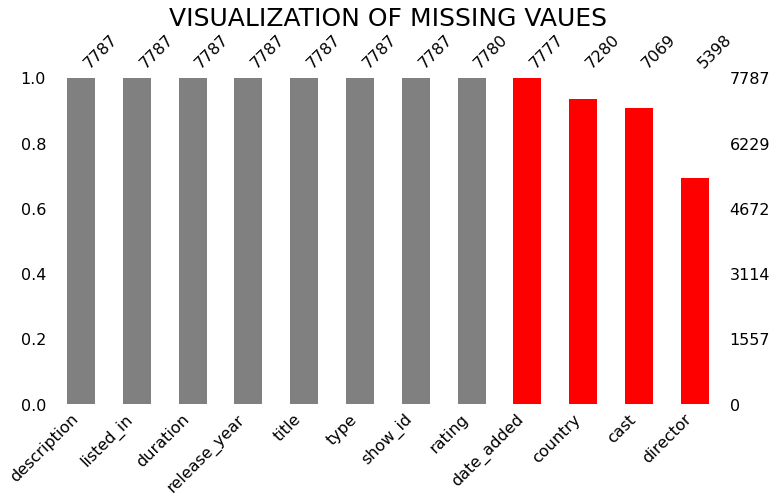

In [10]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','red','red','red','red']
missingno.bar(netflix_df,fontsize =16, sort = 'descending', figsize = (12,6),color=color)
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=25)
plt.show()

#### Most of the values are missing from Director and cast column and some are in country and data added column.Lets impute the missing values

In [15]:
# handling missing values
netflix_df['director'] = netflix_df['director'].fillna('NoDataAvailable')
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df['cast'] = netflix_df['cast'].fillna('NoDataAvailable')
netflix_df['date_added'] = netflix_df['date_added'].fillna(netflix_df['date_added'].mode()[0])
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
print('count of values')
print(netflix_df.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Adding few more columns

In [25]:
netflix_df['year']=pd.DatetimeIndex(netflix_df['date_added']).year
netflix_df['month']=pd.DatetimeIndex(netflix_df['date_added']).month
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df["ratings_ages"]=netflix_df["rating"].replace(ratings_ages)

In [26]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,ratings_ages
0,s1,TV Show,3%,NoDataAvailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,Teens


### Data visualization

## 1.How content is distributed

In [56]:
x=netflix_df["type"].value_counts().reset_index()
x

,index,type
0,Movie,5377
1,TV Show,2410


In [57]:
px.pie(x,values="type",names="index")

Its seems that 69.1% of content is movies and 30.9% is Tv-shows

## 2. Countries with highest number of movies and tv shows

Text(0.5, 1.0, 'TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND TVSHOWS')

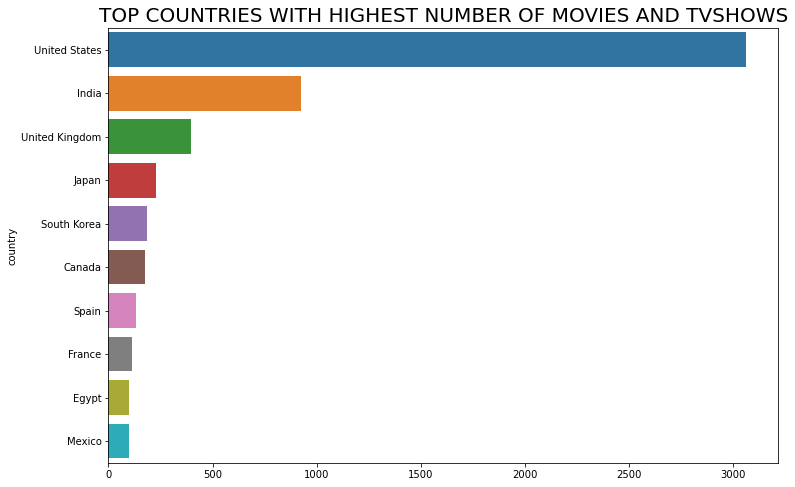

In [78]:
plt.figure(figsize=(12,8))
netflix_df.head()
df=netflix_df.groupby('country')['type'].count().sort_values(ascending=False).head(10)
sns.barplot(df.values,df.index)
plt.title("TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND TVSHOWS",fontsize=20)

In [118]:
m=netflix_df[netflix_df['type']=='Movie']
movies=m['country'].value_counts().reset_index().head(10)
movies.head()

,index,country
0,United States,2080
1,India,852
2,United Kingdom,193
3,Canada,118
4,Egypt,89


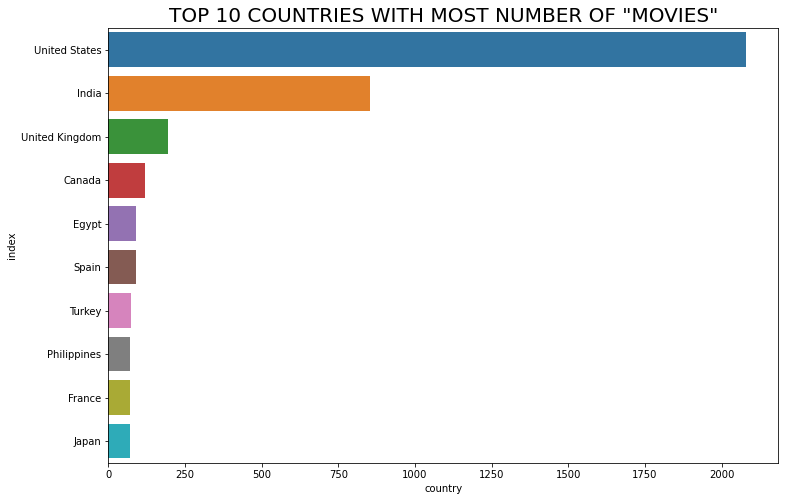

In [134]:
plt.figure(figsize=(12,8))
sns.barplot(movies['country'],movies['index'])
plt.title('TOP 10 COUNTRIES WITH MOST NUMBER OF "MOVIES"',fontsize=20)
plt.show()

In [132]:
tv=netflix_df[netflix_df['type']=='TV Show']
tvshow=tv['country'].value_counts().reset_index().head(10)

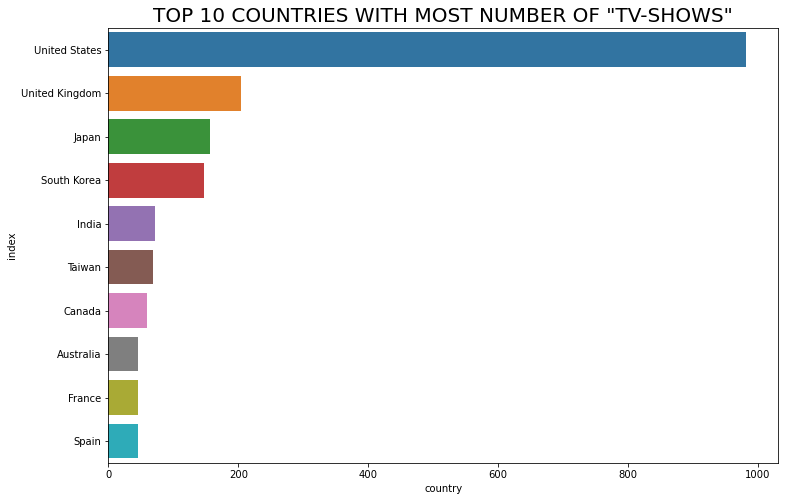

In [135]:
plt.figure(figsize=(12,8))
sns.barplot(tvshow['country'],tvshow['index'])
plt.title('TOP 10 COUNTRIES WITH MOST NUMBER OF "TV-SHOWS"',fontsize=20)
plt.show()

### US is the country with highest number of content

## 3.Contents added over years

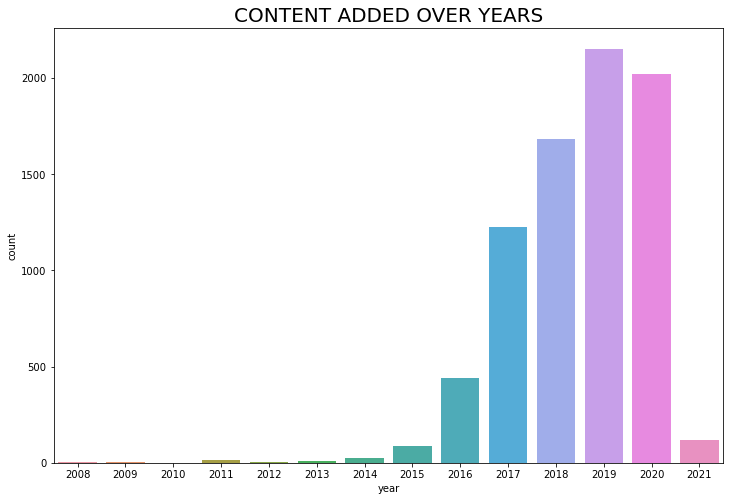

In [142]:
plt.figure(figsize=(12,8))
sns.countplot(netflix_df['year'])
plt.title("CONTENT ADDED OVER YEARS",fontsize=20)
plt.show()

### 2019 is the year with most number of tv shows and movies being added

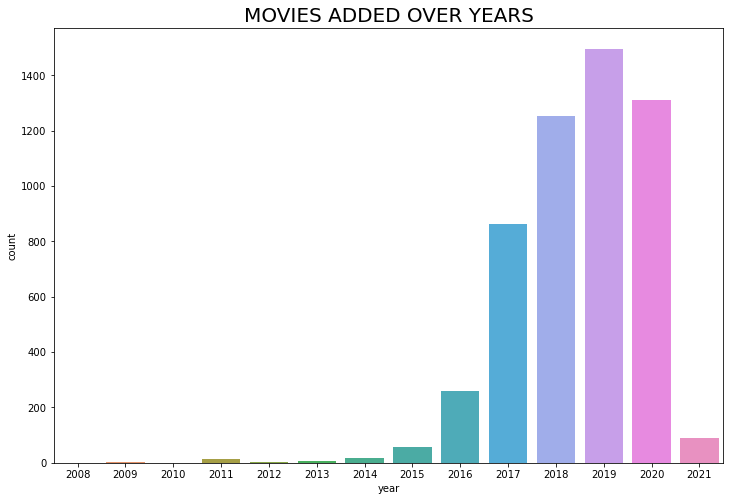

In [150]:
movie=netflix_df[netflix_df['type']=='Movie']
plt.figure(figsize=(12,8))
sns.countplot(movie['year'])
plt.title("MOVIES ADDED OVER YEARS",fontsize=20)
plt.show()


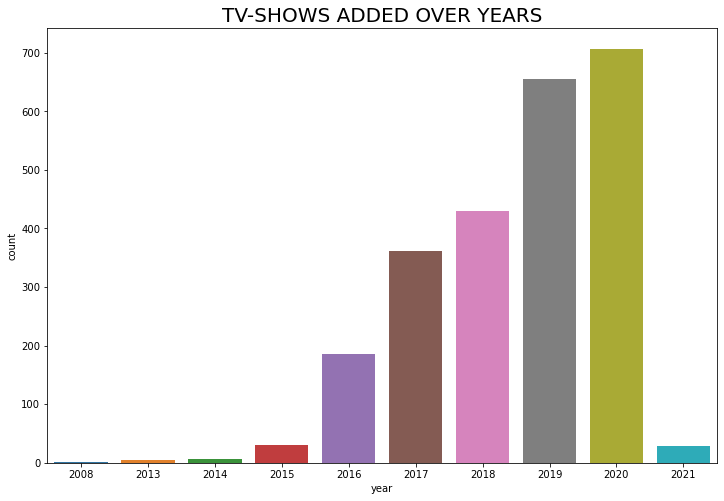

In [154]:
TV=netflix_df[netflix_df['type']=='TV Show']
plt.figure(figsize=(12,8))
sns.countplot(movie['year'])
plt.title("TV-SHOWS ADDED OVER YEARS",fontsize=20)
plt.show()


### In the year 2020 most of the Tv shows wear added in the year 2019 most of the movies wear added